

# Train Practice

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates.

*Don't forget to switch to GPU on Colab!*


------

# Objective

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning.

In [1]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [5]:
def load_quickdraw10():
    """
    Fill out this doc string, and comment the code, for practice in writing the kind of code that will get you hired.
    """

    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"

    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']

    return train_test_split(X, Y, shuffle=True)

In [6]:
X_train, X_test, y_train, y_test = load_quickdraw10()

25421363/25421363 [==============================] - 0s 0us/step


In [7]:
n_labels = len(np.unique(y_train))

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset.

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer`
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric

We will use this function to build all the models that we'll need to run our experiments.

In [8]:
def create_model(lr=.01, opt="adam"):
    """

    Build and returns a compiled Keras model.

    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent

    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"

    Returns
    -------
    model: keras object
        A compiled keras model
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == "sgd":
        opt = SGD(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

### BEGIN SOLUTION
    model = Sequential([
                        Dense(250, activation='sigmoid', input_dim=784),
                        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model
### END SOLUTION

In [9]:
# check model architecture
model = create_model()
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 250,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': 

In [10]:
# check the number of layers
n_layers = len(model.get_config()["layers"])

# check the activation function of the last layer
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

# test for expected output
assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output activation function should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training a model on both a normalized data set and on a non-normalized data set.

Then we will compare and analyze the trained weight values for the two cases.

In [11]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [12]:
%%time
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          workers=-2,
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 18s 7ms/step - loss: 0.9499 - accuracy: 0.7053 - val_loss: 0.8334 - val_accuracy: 0.7411
Epoch 2/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.8207 - accuracy: 0.7452 - val_loss: 0.7956 - val_accuracy: 0.7570
Epoch 3/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.7900 - accuracy: 0.7548 - val_loss: 0.7662 - val_accuracy: 0.7614
Epoch 4/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.7525 - accuracy: 0.7659 - val_loss: 0.7384 - val_accuracy: 0.7753
Epoch 5/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.7402 - accuracy: 0.7705 - val_loss: 0.7505 - val_accuracy: 0.7656
Epoch 6/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.7256 - accuracy: 0.7759 - val_loss: 0.7151 - val_accuracy: 0.7809
Epoch 7/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.7091 - accuracy: 0.7812 - val_loss: 0.7256 - val_ac

---------

### Fit Model on Normalized data

In [13]:
# Normalize your training and test sets
# save normalized data to variables X_train_scaled and X_test_scaled

###BEGIN SOLUTION
X_train_scaled = X_train/X_train.max()
X_test_scaled = X_test/X_test.max()

###END SOLUTION

In [14]:
%%time
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=0.001, opt="adam")

norm_model.fit(X_train_scaled, y_train,
          validation_data=(X_test_scaled, y_test),
          workers=-2,
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 22s 9ms/step - loss: 0.7747 - accuracy: 0.7703 - val_loss: 0.6179 - val_accuracy: 0.8198
Epoch 2/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.5534 - accuracy: 0.8348 - val_loss: 0.5187 - val_accuracy: 0.8480
Epoch 3/10
2344/2344 [==============================] - 19s 8ms/step - loss: 0.4694 - accuracy: 0.8601 - val_loss: 0.4716 - val_accuracy: 0.8598
Epoch 4/10
2344/2344 [==============================] - 19s 8ms/step - loss: 0.4123 - accuracy: 0.8775 - val_loss: 0.4508 - val_accuracy: 0.8668
Epoch 5/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.3704 - accuracy: 0.8899 - val_loss: 0.4404 - val_accuracy: 0.8689
Epoch 6/10
2344/2344 [==============================] - 19s 8ms/step - loss: 0.3358 - accuracy: 0.9010 - val_loss: 0.4253 - val_accuracy: 0.8734
Epoch 7/10
2344/2344 [==============================] - 19s 8ms/step - loss: 0.3052 - accuracy: 0.9104 - val_loss: 0.4229 - val_ac

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard.

Assuming that you've run `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be
- dense_2
- dense_3

The name of the layers for `norm_model` should be
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Pro Tip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernel.

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 250)               196250    
                                                                 
 dense_3 (Dense)             (None, 10)                2510      
                                                                 
Total params: 198760 (776.41 KB)
Trainable params: 198760 (776.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 250)               196250    
                                                                 
 dense_5 (Dense)             (None, 10)                2510      
                                                                 
Total params: 198760 (776.41 KB)
Trainable params: 198760 (776.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### How to calculate the number of parameters in a neural network layer
Let's verify that the `dense_2` layer has 196250 parameters.<br>
The `dense_2` layer has $250$ neurons (also called units or nodes).<br>
Each neuron has a weights vector and a scalar bias.<br><br>
**Question:** How many weights does each neuron have?<br><br>
**Answer:** The number of a neuron's weights is equal to its number of inputs. <br>
The input to each neuron in this layer is a $28\times 28$ image, <br>composed of $784~(=~28^2)$ pixel values. <br>
Each neuron has $784$ inputs, and therefore $784$ weights.<br><br>
So the total number of parameters in the `dense_2` layer is<br><br>
$N_{dense\_2} = 250~~\text{neurons} \times (784~\text{weights per neuron} + 1 ~ \text{bias per neuron}) = 196250$

In [17]:
250*(784+1)

196250

### Now your turn: can you verify that the number of parameters in the `dense_3` layer is $2510$?

### Your Explanation Here
$N_{dense\_3} = 10~~\text{neurons} \times (250~\text{weights per neuron} + 1 ~ \text{bias per neuron}) = 2510$

### Tensorboard

- Run the cell below to launch tensorboard
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights

In [ ]:
%tensorboard --logdir logs

### Tensorboard

Check out the loss and accuracy plots on the `SCALARS` tab.

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data.

Recall that during training, the model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer.

Now click on the `HISTOGRAM` tab.

You should see both of your model's layer names.

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`).

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernel distributions are the weight values.**

The `bias` distributions are the bias values.

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribution at the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing shows 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.**!

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalized data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`.

Now it's time to analyze those weight values more closely.

----------
### Analyze Weights in Each Layer

In [19]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
bias, weights = layer.get_weights()

In [20]:
# get the final  value bias and weight matrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

In [21]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/).

The cell below is sampling values from the `GlorotUniform` distribution. Let's sample from the `GlorotUniform` distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts updating their values at training time.

In [22]:
# let's take 250 random samples from GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=42)
initial_weight_values = initializer(shape=(1, 250))

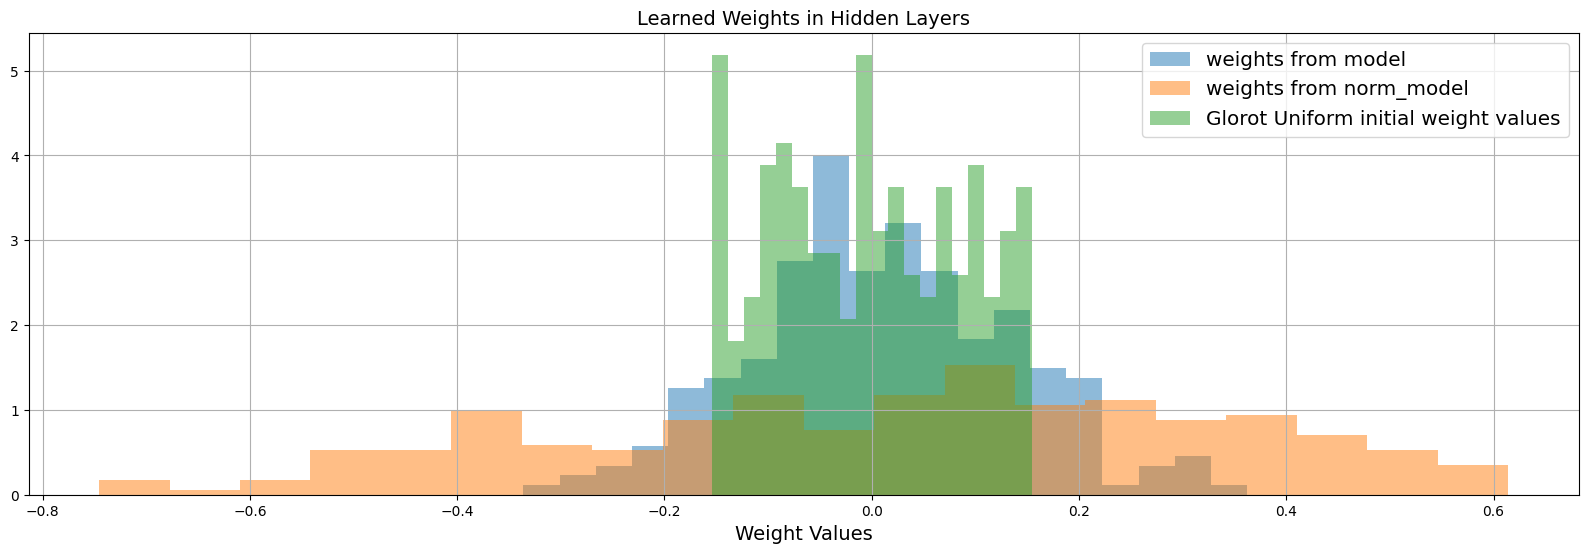

In [25]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers",fontsize=14)
plt.xlabel("Weight Values",fontsize=14)
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="Glorot Uniform initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effects of varying Batch Size, Learning Rate, choice of Optimizer on model accuracy.

Using our `create_model` model building function, conduct the following experiments.

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice.
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday.

In [26]:
norm_model = create_model(lr=0.001, opt="adam")

norm_model.fit(X_train_scaled, y_train,
          validation_data=(X_test_scaled, y_test),
          workers=-2,
          epochs=10,
          batch_size=50,
          verbose=1,
          callbacks=[tensorboard])

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8142 - accuracy: 0.7593 - val_loss: 0.6538 - val_accuracy: 0.8103
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5906 - accuracy: 0.8247 - val_loss: 0.5490 - val_accuracy: 0.8385
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5021 - accuracy: 0.8515 - val_loss: 0.4966 - val_accuracy: 0.8541
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4451 - accuracy: 0.8681 - val_loss: 0.4654 - val_accuracy: 0.8623
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4029 - accuracy: 0.8802 - val_loss: 0.4475 - val_accuracy: 0.8671
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3687 - accuracy: 0.8905 - val_loss: 0.4374 - val_accuracy: 0.8701
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3392 - accuracy: 0.8995 - val_loss: 0.4281 - val_ac

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, 0.1, 0.01, 0.001, 0.0001.
* Use the "best" batch size from the previous experiment
* Visualize the results using `tensorboard`
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.

In [27]:
norm_model = create_model(lr=0.0001, opt="adam")

norm_model.fit(X_train_scaled, y_train,
          validation_data=(X_test_scaled, y_test),
          workers=-2,
          epochs=10,
          batch_size=50,
          verbose=1,
          callbacks=[tensorboard])

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2314 - accuracy: 0.6688 - val_loss: 0.9376 - val_accuracy: 0.7336
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.8792 - accuracy: 0.7467 - val_loss: 0.8364 - val_accuracy: 0.7583
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8088 - accuracy: 0.7643 - val_loss: 0.7878 - val_accuracy: 0.7710
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7657 - accuracy: 0.7766 - val_loss: 0.7510 - val_accuracy: 0.7838
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7314 - accuracy: 0.7869 - val_loss: 0.7225 - val_accuracy: 0.7908
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.7020 - accuracy: 0.7955 - val_loss: 0.6973 - val_accuracy: 0.7996
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6758 - accuracy: 0.8030 - val_loss: 0.6740 - val_ac

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See documentation for [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results using `tensorboard`
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment, this time combining Learning Rate and different optimizers in the same run. Does the best performing model change?

------

## Stretch Goals:

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent.